In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering

from gensim.models import Word2Vec
import nltk
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
import re
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.decomposition import LatentDirichletAllocation

embedder = SentenceTransformer('distilroberta-base-paraphrase-v1')

In [2]:
df = pd.read_csv("Foia.csv")
df = df.fillna(method="ffill")

In [3]:
sentence = []
for index, row in df.iterrows():
    sentence.append(row['Description'])

In [4]:
corpus_embeddings = embedder.encode(sentence)

In [5]:
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

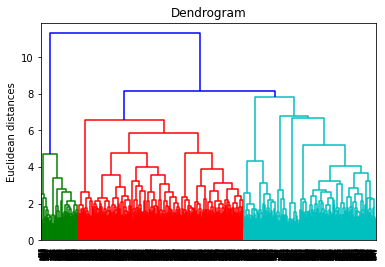

In [6]:
Z = hierarchy.linkage(corpus_embeddings, "ward")
dn = hierarchy.dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
#plt.xlim(0,100)
#plt.ylim(1.2,1.4)
plt.show()

In [12]:
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=3) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(sentence[sentence_id])


#for i, cluster in clustered_sentences.items():
    #print("Cluster ", i+1)
    #print(cluster)
    #print("")

In [13]:
length = len(clustered_sentences)

In [14]:
def exe():
    D = {}
    for i,topic in enumerate(LDA.components_):
        x = [count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]]
        for j in x:
            if j in D:
                D[j] += 1
            else: D[j] = 1
    Sorted = sorted(D.items(), key=lambda x: x[1], reverse=True)
    lst = []
    Useless_Word = ["requesting","request", "requests", "copy", "copies", "documents", "document", "information", "informations", "department", "departments", "records", "record", "reports", "report"] 
    for i in Sorted:
        if i[0] in Useless_Word:
            None
        else:
            lst.append(i[0])
        if len(lst) == 3:
            return lst   

In [15]:
for i in range(length):
    count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
    doc_term_matrix = count_vect.fit_transform(clustered_sentences[i])
    LDA = LatentDirichletAllocation(n_components=5, random_state=42)
    LDA.fit(doc_term_matrix)
    print(f"Cluster Number {i+1}: ", exe())
    print("Cluster Size: ", len(clustered_sentences[i]))
    print('\n')

Cluster Number 1:  ['data', 'government', 'list']
Cluster Size:  103


Cluster Number 2:  ['iraq', '2006', 'military']
Cluster Size:  96


Cluster Number 3:  ['awarded', 'defense', 'contracts']
Cluster Size:  181


Cluster Number 4:  ['defense', 'concerning', 'research']
Cluster Size:  160


Cluster Number 5:  ['relating', '2001', 'secretary']
Cluster Size:  194


Cluster Number 6:  ['war', 'concerning', 'following']
Cluster Size:  137


Cluster Number 7:  ['military', 'service', 'defense']
Cluster Size:  114


Cluster Number 8:  ['2006', 'relating', 'iraqi']
Cluster Size:  144


Cluster Number 9:  ['requester', 'military', 'united']
Cluster Size:  93


Cluster Number 10:  ['concerning', 'army', 'dodig']
Cluster Size:  105


Cluster Number 11:  ['concerning', 'ronald', 'national']
Cluster Size:  93


Cluster Number 12:  ['concerning', 'pertaining', 'release']
Cluster Size:  116


Cluster Number 13:  ['releasable', 'solicitation', 'program']
Cluster Size:  80


Cluster Number 14:  ['num

In [11]:
clustered_sentences[0]

['All records regarding the service of the 208th Engineer Combat Battalion anytime between December 7, 1941 and January 1, 1947.',
 'Information relating to an operation at the end of the Gulf War in April of 1991\ndubbed "Operation Manly Rip".',
 'Back ground information relating to PSYOPS and there place in modern warfare.',
 'Referral from DOS for review concerning the Iraq Foundation from January 2002 to\nthe present.',
 'Records concerning the North American Forum at the Banff Springs Hotel in Banif, Alberta, Canada on September 12 — 14, 2006.',
 'Requests the release of document AD 0356914 entitled "Studies in Advanced Penetration Problems", (dated January 24, 1965).',
 'The participation of the listed DoD personnel at a North American Forum at the Banff Springs Hotel in Banff, Alberta, Canada on September 12 — 14, 2006.',
 'Any reports, memos, cables, or briefing papers on a U.S. "false missile alert” that occurred overnight on 9 November 1979 and led to momentary concerns in th